In [16]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
import tensorflow as tf
from tensorflow import keras
import keras.layers as layers
from keras.preprocessing.image import ImageDataGenerator

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
training_datagen = ImageDataGenerator(rescale = 1./255,
                                      shear_range = 0.2,
                                      zoom_range = 0.2,
                                      horizontal_flip = True)

training_set = training_datagen.flow_from_directory('/content/drive/My Drive/cat_or_dog/training_set',
                                                 target_size = (227, 227),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
                                                 
                                                 
                                                 

Found 4000 images belonging to 2 classes.


In [19]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/cat_or_dog/test_set',
                                            target_size = (227, 227),
                                            batch_size = 32,
                                            class_mode = 'binary'
                                            )

Found 1000 images belonging to 2 classes.


In [20]:
model = keras.Sequential()
model.add(layers.Conv2D(filters=96, kernel_size=(11, 11), 
                        strides=(4, 4), activation="relu", 
                        input_shape=(227, 227, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))
model.add(layers.Conv2D(filters=256, kernel_size=(5, 5), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation="softmax"))
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.optimizers.SGD(lr=0.001), 
              metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [22]:
history = model.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
125/125 [==============================] - 75s 596ms/step - loss: 1.6714 - accuracy: 0.5755 - val_loss: 1.7313 - val_accuracy: 0.5000
Epoch 2/50
125/125 [==============================] - 72s 576ms/step - loss: 1.0649 - accuracy: 0.6168 - val_loss: 0.9758 - val_accuracy: 0.5130
Epoch 3/50
125/125 [==============================] - 71s 571ms/step - loss: 0.8673 - accuracy: 0.6455 - val_loss: 1.1157 - val_accuracy: 0.5410
Epoch 4/50
125/125 [==============================] - 72s 573ms/step - loss: 0.7746 - accuracy: 0.6637 - val_loss: 0.8655 - val_accuracy: 0.6010
Epoch 5/50
125/125 [==============================] - 74s 590ms/step - loss: 0.7170 - accuracy: 0.6815 - val_loss: 0.6250 - val_accuracy: 0.6850
Epoch 6/50
125/125 [==============================] - 71s 572ms/step - loss: 0.6569 - accuracy: 0.6923 - val_loss: 1.1315 - val_accuracy: 0.5450
Epoch 7/50
125/125 [==============================] - 71s 571ms/step - loss: 0.6145 - accuracy: 0.7035 - val_loss: 0.7122 - val_ac

In [30]:
from keras.backend import reshape
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('maya.jpg', target_size=(227, 227))
img = image.load_img('maya.jpg', target_size=(227, 227))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'kopek'
else:
  prediction = 'kedi'


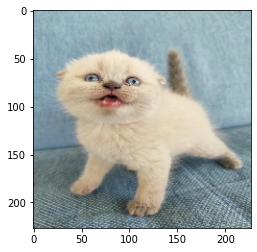

In [32]:
imgplot = plt.imshow(img)
plt.show()


In [27]:
print(prediction)

kedi


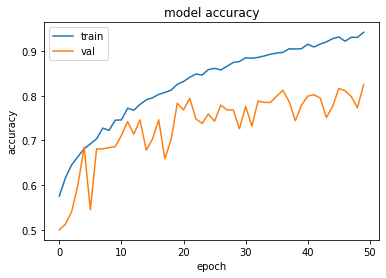

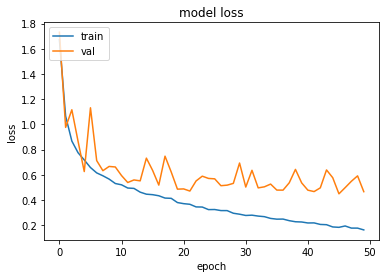

In [23]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()